LOANS are the major requirement of the modern world. By this only, Banks get a major part of the total profit. It is beneficial for students to manage their education and living expenses, and for people to buy any kind of luxury like houses, cars, etc.

But when it comes to deciding whether the applicant’s profile is relevant to be granted with loan or not. Banks have to look after many aspects.

So, here we will be using Machine Learning with Python to ease their work and predict whether the candidate’s profile is relevant or not using key features like Marital Status, Education, Applicant Income, Credit History, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"C:\Users\madhu\Downloads\LoanApprovalPrediction.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
obj = (data.dtypes == 'object')
print("Categorical variables:", len(list(obj[obj].index)))

Categorical variables: 7


In [5]:
# Dropping Loan_ID column
data.drop(['Loan_ID'] , axis = 1 , inplace = True)

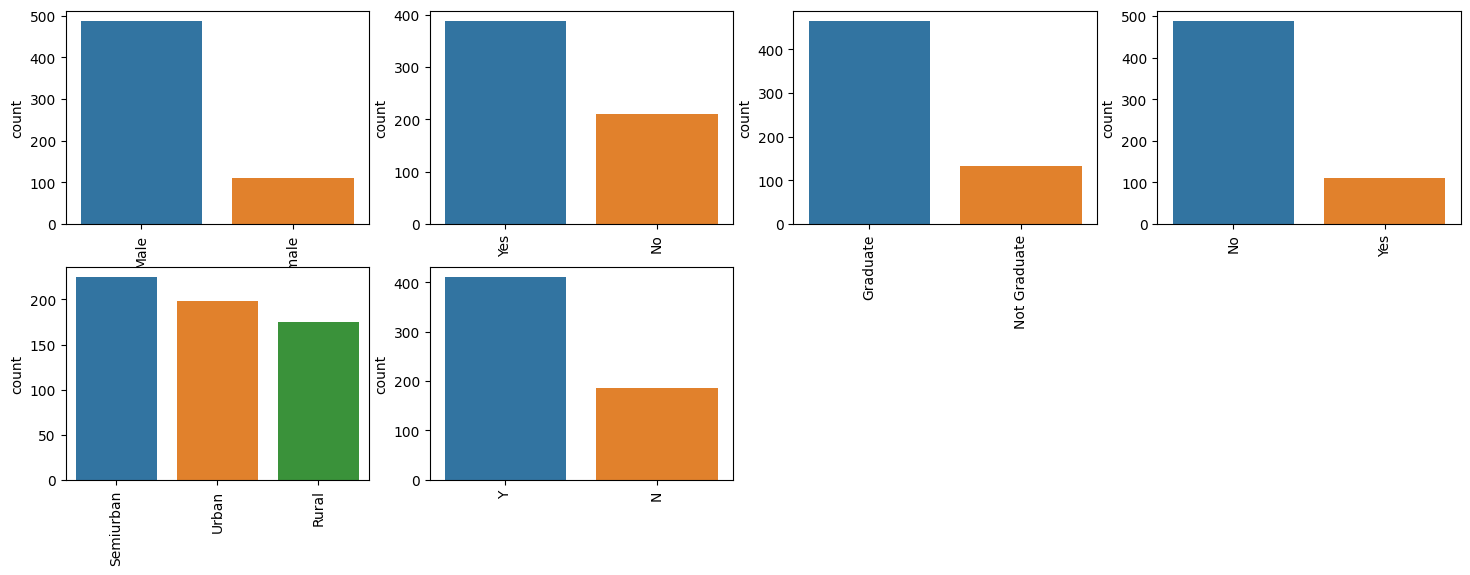

In [6]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize = (18,36))
index = 1

for col in object_cols:
    y = data[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation = 90)
    sns.barplot(x=list(y.index), y=y) 
    index +=1

As all the categorical values are binary so we can use Label Encoder for all such columns and the values will change into int datatype.

In [7]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in list(obj[obj].index):
    data[col] = le.fit_transform(data[col])

Again check the object datatype columns. Let’s find out if there is still any left.

In [8]:
obj = (data.dtypes == 'object')
print("categorical variables:" , len(list(obj[obj].index)))

categorical variables: 0


plt.figure(figsize = (12 , 6))
sns.heatmap(data.corr() , cmap = 'magma' , fmt = '.2f' , linewidth = 2 , annot = True)

The above heatmap is showing the correlation between Loan Amount and ApplicantIncome. It also shows that Credit_History has a high impact on Loan_Status.

Now we will use Catplot to visualize the plot for the Gender, and Marital Status of the applicant.

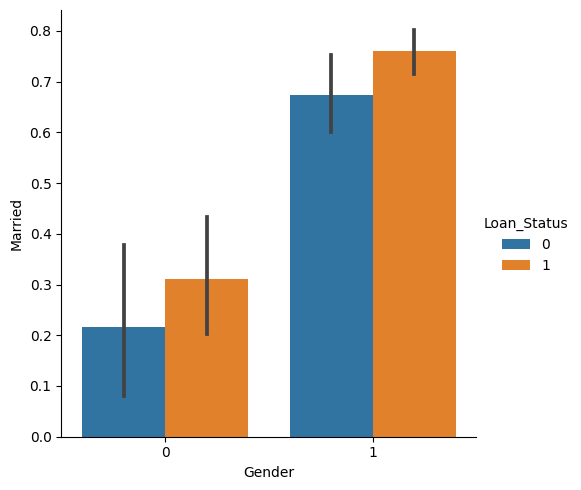

In [9]:
sns.catplot(x = "Gender" , y = "Married",hue = "Loan_Status" , kind = "bar" , data = data)
plt.show()

In [10]:
# checking missing values

data.isnull().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
# Handling missing values

for col in data.columns:
    data[col] = data[col].fillna(data[col].mean())

In [13]:
# now checking missing values again
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As there is no missing value then we must proceed to model training.



# Splitting dataset

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = data.drop(["Loan_Status"],axis = 1)
Y = data["Loan_Status"]

In [16]:
X.shape , Y.shape

((598, 11), (598,))

In [17]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 1)

In [18]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((478, 11), (120, 11), (478,), (120,))

# Model Training and Evaluation

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [20]:
knn = KNeighborsClassifier(n_neighbors = 3)
rfc = RandomForestClassifier(n_estimators = 7 , criterion = 'entropy' , random_state = 7)
svc = SVC()
lc = LogisticRegression()

In [21]:
from sklearn import metrics 

In [22]:
# making predictions on the training set 
for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_train) 
    print("Accuracy score of ", 
          clf.__class__.__name__, 
          "=",100*metrics.accuracy_score(Y_train,  
                                         Y_pred))

Accuracy score of  RandomForestClassifier = 96.02510460251045
Accuracy score of  KNeighborsClassifier = 79.9163179916318
Accuracy score of  SVC = 68.41004184100419
Accuracy score of  LogisticRegression = 79.70711297071131


In [23]:
# Prediction on the test set:

for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_test) 
    print("Accuracy score of ", 
          clf.__class__.__name__,"=", 
          100*metrics.accuracy_score(Y_test, 
                                     Y_pred))

Accuracy score of  RandomForestClassifier = 80.0
Accuracy score of  KNeighborsClassifier = 60.0
Accuracy score of  SVC = 72.5
Accuracy score of  LogisticRegression = 85.0


Conclusion : 
Random Forest Classifier is giving the best accuracy with an
accuracy score of 82% for the testing dataset. And to get much better results
ensemble learning techniques like Bagging and Boosting can also be used.
